	
# <center><u>KMeans Clustering (Core)</u>
* Authored By: Eric N Valdez
* Date: 03/8/2024

## `KMeans Clustering (Core)`

## <u>Task</u>

* Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. 
* We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt-to-income ratio to group them into segments.

* You can download the [data here](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv). The original data is from this [data source.](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means)

## <u>Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Warnings
import warnings

# Set filter warnings to ignore
warnings.filterwarnings('ignore')

## <u>Custom Settings

In [2]:
# Set MatPlotLib default parameters
plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'bold',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': 'black',
                       'axes.linewidth': 2,
                       'axes.titlesize': 14,
                     'axes.titleweight': 'bold',
                       'axes.labelsize': 12,
                     'axes.labelweight': 'bold',
                      'xtick.labelsize': 10,
                      'ytick.labelsize': 10,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': 'black',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'black'})

## <u>Load Data

In [3]:
df = pd.read_csv('Data/cust_seg.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [5]:
df.shape

(850, 10)

### <u>EDA and Data Cleaning

In [6]:
# Looking for missing values
df.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [7]:
# Cleaning Data for Mode
mode = df['Defaulted'].mode()[0]
df['Defaulted'].fillna(mode, inplace=True)
df.isna().sum()

Unnamed: 0         0
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [8]:
# Checking for duplicate rows
print('Number of Duplicated Rows', df.duplicated().sum())
print('\n')

Number of Duplicated Rows 0




In [9]:
# Checking dtypes
df.dtypes

Unnamed: 0           int64
Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

In [10]:
# Rechecking info to make sure data is cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        850 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [11]:
# Dropping unnecessary columns
df.drop(columns=['Unnamed: 0', 'Customer Id'], inplace=True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [12]:
# Scaling the data
scaler = StandardScaler()
processed_df = scaler.fit_transform(df)

## `1. Use KMeans to create various customer segments.`
### 1. Use an Elbow Plot of inertia.

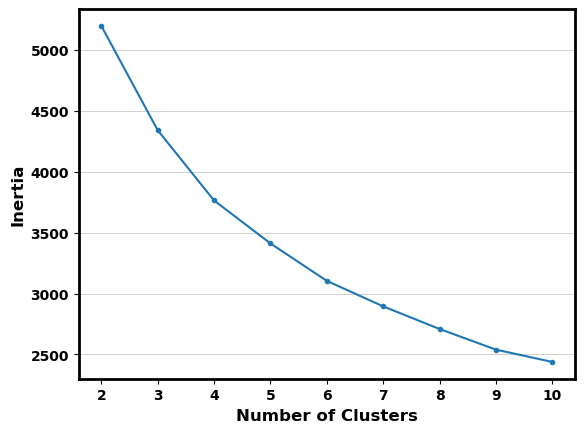

In [13]:
# Create an empty list of inertias
inertias = []

# Loop through k values between 2 and 10
# and store the scores in the list
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_df)
    inertias.append(kmeans.inertia_)

# Visualize the scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

### 2. And a plot of Silhouette Scores.

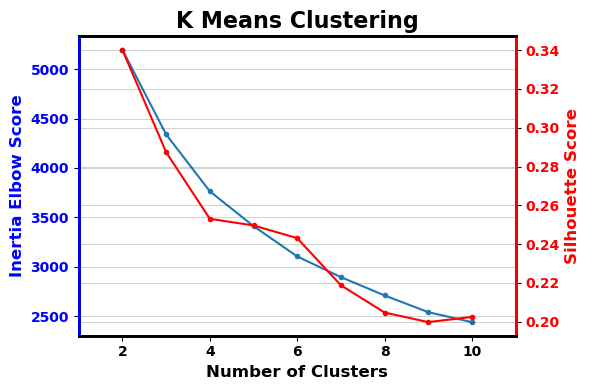

In [14]:
# Creating empty lists for score 
inertias = []
silhouette_scores = []

# Looping through k values between 2 and 10
# and store the scores in the list
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(processed_df)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(processed_df, kmeans.labels_))

# Visualizing the scores
fig, ax1 = plt.subplots(figsize=(6,4))
plt.title('K Means Clustering', fontsize = 16, weight='bold')

ax1.plot(range(2, 11), inertias, marker = '.')
ax1.set_ylabel('Inertia Elbow Score', color='blue', fontsize = 12, weight='bold')
plt.xlabel('Number of Clusters', fontsize = 12, weight='bold')
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold')
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_ticks(np.arange(0, 12, 2))

plt.xlim([1, 11])

ax2 = ax1.twinx()
ax2.plot(range(2, 11), silhouette_scores, color='r', marker = '.')
ax2.set_ylabel('Silhouette Score', color='r', fontsize = 12, weight='bold', )
plt.yticks(fontsize = 10, weight='bold');
ax2.tick_params(axis='y', labelcolor='r')
ax2.spines['right'].set_color('r')

ax2.spines['left'].set_color('blue');
ax2.spines['right'].set_color('r');

plt.tight_layout()
plt.show;


### 3. Choose a K based on the results.

In [15]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(processed_df)

KMeans(n_clusters=6, random_state=42)

In [16]:
df['cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,5
2,33,2,10,57,6.111,5.802,1.0,20.9,5
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


In [17]:
cluster_groups = df.groupby('cluster')
cluster_mean_df = cluster_groups.mean()
cluster_mean_df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,
0,46.285714,1.928571,22.642857,213.142857,11.737786,16.239857,0.571429,16.821429
1,31.807018,1.298246,5.748538,28.985380,0.711871,1.553386,0.000000,8.127485
2,41.753086,1.438272,16.604938,71.265432,1.438457,2.795253,0.012346,6.556173
3,33.534884,3.500000,4.895349,42.581395,1.018651,2.342977,0.069767,8.452326
4,31.503448,1.744828,3.558621,28.875862,1.399931,2.436090,1.000000,13.578621
5,39.930693,1.940594,13.574257,73.099010,4.048356,8.423574,0.217822,18.543564


## `2. Analyze the clusters you made in Part 1.`  
### 1. Create analytical visualizations that explore statistics for each feature for each cluster.

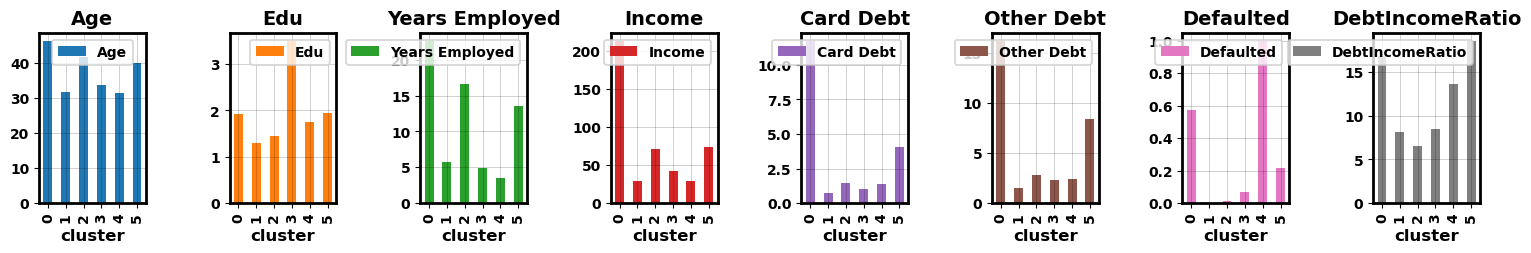

In [18]:
cluster_mean_df.plot(subplots=True,
                   kind='bar',
                   figsize=(15, 9),
                   layout =(4, 8))
plt.tight_layout();

### 2. `Write a description of each cluster based on the visualizations you created.`
  1. Do more than describe the numbers; try to see beyond the numbers and describe the people represented by each cluster.
  2. Include at least one insight for each cluster.

### Age:
### `Clusters in the visualization plots the means`
* Clusters 0, and 2 have all mean ages above 40
* Clustes 1, 3, 4, and 5 have the mean age above 40
* Cluster 5 is above 30 but is equal to 40atio

### Edu:
### `Clusters in the visualization plots the means`
* Clusters 0, 2, 4, and 5 have a mean level of eduction that ranges between 1 and < 2.
* Cluster 3 is greater than 2 and > 3 they have the most Education

### Years Employed:
### `Clusters in the visualization plots the means`
* Cluster 3 and 4 are < than 5 years of eduction
* Cluster 1 > than 5 and < than 7 years of employment
* Cluster 2 and 5 are > 10yrs and less that 17yrs
* Cluster 0 > than 20 yrs in experience

### Income:
### `Clusters in the visualization plots the means`
* Cluster 0 > 200k above all the other clusters
* Cluster 2 and 5 have a median range between 50k to 100k
* Cluster 1, 3, and 4 median is below 50k

### Card Debt:
### `Clusters in the visualization plots the means`
* Cluster 1, 2, 3, 4 credit card debt < then 2.5
* Cluster 5 credit debt is above 2.5 < 5.0
* Cluster 0 is high in card debt that > 10.0

### Other Debt:
### `Clusters in the visualization plots the means`
* Cluster 1 > 1 and < 2
* Cluster 2, 3, 4 the median is > 2 and < 3
* Cluster 5 is > 8 and its median is < 9
* Cluster 0 is the higest in other debt > 16

### Defaulted:
### `Clusters in the visualization plots the means`
* Cluster 1, 2, 3 median is < .1 and close to 0
* Cluster 5 is slightly above .2 range
* Cluster 0 median is > .4 and < .6
* Cluster 4 median is > .8 and = 1.0

### Debt Income Ratio:
### `Clusters in the visualization plots the means`
* Cluster 1, 2, 3 median ranges > 6.5 and less than 8.5
* Cluster 4 > 13.4
* Cluster 0 , and 5 are high in ranged >16 < 18.6

### `Describe the Clusters`
0. 50+:
* Mid level Education many years of employment, high income, high debt (both credit and other debt), with mid range of defaults, but high debt income ratio. 

1. 30s:
* Education for these young folk is midway on the spectrum, while being emloyed for at least 5 yrs, hovwever there income is the lowest of the 5 clusters, they do have low credit and other debt, there default is 1 or zero. With a Debt income ratio being above 5 and below 9

2. Early 40's:
* Our early 40s have achieved less education but have been employed for 16+ yrs. Income is also high on the 70k range, with low card debt and high other debt, low defaults DIR the lowest at 6.5 of all the clusters.
  
3. Mid 30's:
*  Education is high, but have been able to show close to 5 yrs of employment, with income close to 40, they do seem to have cc debt but midrange in other debt, very low defaults, with an increase of 8 in the debt income ratio.
  
4. Early 30's
* Another young group entering into the 30's have gained some more education, but show less yrs of employment from cluster 1, with there income almost the same in the 28 range. They do have high cc debt, and higer other debt then cluster 1, plus they have the highest defaults and a DIR at 13.5.

5. Late 30's
* Our Late bloomers have mid high education range similar to our 50+, but have 13 yrs of employment, with income high, cc debt is one of the higest, other debt is midrange high, with a 3rd high in defaults, and a DIR being the highest of the 5 clusters. spenders

## 3.`Create one or two recommendations for your stakeholders (the credit card company) regarding how they should market credit cards differently or which cards they should market to each cluster based on your data and insights.`

Overall CC companies could offer lower rates for those that are low in debt. Have higher debts have higher rates. This would help in creating higher debt to go down. The main importance is to creat cards that low APR to help those with high debts. Have people with low debt have an increase in line of credit with midrange APR. 